# Desafío 1 - PLN - 19 cohorte

**Alumno**: Jose Perez (joseperez190498@gmail.com)

##**Resolución de la consigna**



### Análisis exploratorio

In [2]:
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Dividir el dataset en train y test
newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))
X_train = newsgroups_train.data
y_train = newsgroups_train.target

X_test = newsgroups_test.data
y_test = newsgroups_test.target
target_names = newsgroups_train.target_names


In [4]:
# Listar categorías
print("Categorías del dataset:")
print(target_names)
print(f"\nTotal de categorías: {len(target_names)}")

Categorías del dataset:
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']

Total de categorías: 20


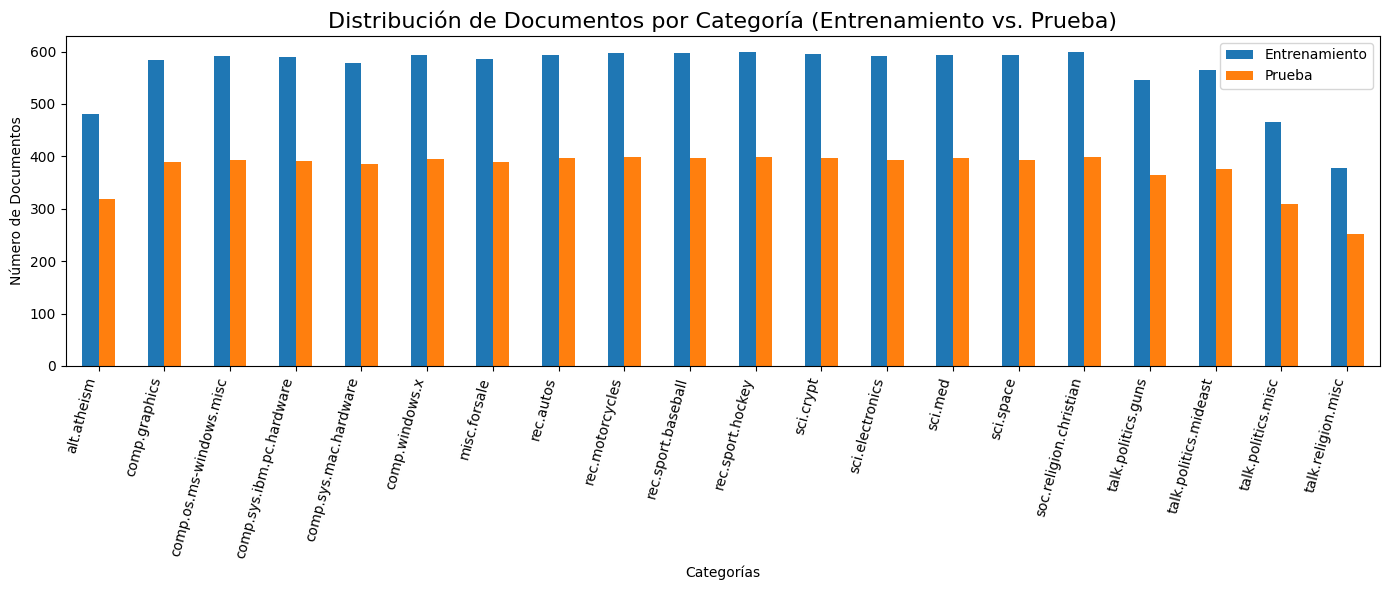

In [5]:
# Graficar dataframe
train_counts = pd.Series(y_train).value_counts().sort_index()
test_counts = pd.Series(y_test).value_counts().sort_index()

counts_df = pd.DataFrame({ 'Entrenamiento': train_counts, 'Prueba': test_counts })

counts_df.plot(kind='bar', figsize=(14, 6))
plt.title('Distribución de Documentos por Categoría (Entrenamiento vs. Prueba)', fontsize=16)
plt.ylabel('Número de Documentos')
plt.xlabel('Categorías')
plt.xticks(ticks=range(len(target_names)), labels=target_names, rotation=75, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

**Comentario:** Podemos observar que no existe desbalanceo de clases en el set de datos, por lo que no se aplica ningún tipo de preprocesamiento.

In [6]:
# Ver ejemplo de documento
print(f"Documento:\n{X_train[0]}\n")
print(f"Etiqueta (número): {y_train[0]}")
print(f"Etiqueta (nombre): {target_names[y_train[0]]}")

Documento:
I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Etiqueta (número): 7
Etiqueta (nombre): rec.autos


### Parte 1

Vectorizar documentos. Tomar 5 documentos al azar y medir similaridad con el resto de los documentos. Estudiar los 5 documentos más similares de cada uno analizar si tiene sentido la similaridad según el contenido del texto y la etiqueta de clasificación.




In [7]:
import random
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [8]:
# Vectorizar los documentos de entrenamiento
vectorizer_docs = TfidfVectorizer()
X_train_tfidf = vectorizer_docs.fit_transform(X_train)

# Calcular la matriz de similitud del coseno
doc_similarity_matrix = cosine_similarity(X_train_tfidf)
print(doc_similarity_matrix)


[[1.         0.06364277 0.15270686 ... 0.07151477 0.05653518 0.0344128 ]
 [0.06364277 1.         0.09517622 ... 0.12694418 0.02145166 0.02367669]
 [0.15270686 0.09517622 1.         ... 0.10979345 0.06116563 0.02119455]
 ...
 [0.07151477 0.12694418 0.10979345 ... 1.         0.03061309 0.0107973 ]
 [0.05653518 0.02145166 0.06116563 ... 0.03061309 1.         0.01920452]
 [0.0344128  0.02367669 0.02119455 ... 0.0107973  0.01920452 1.        ]]


In [ ]:
# Seleccionar 5 documentos al azar
num_docs = X_train_tfidf.shape[0]
random_indices = random.sample(range(num_docs), 5)

# Iterar sobre cada documento seleccionado
for doc_index in random_indices:
    # Obtener puntajes de similitud para este documento desde la matriz precalculada
    sim_scores = doc_similarity_matrix[doc_index]

    # Ordenar los índices por similitud (de mayor a menor) y tomamos los 5 más altos
    # El primero (índice 0) es el propio documento, por ello se ignora
    most_similar_indices = np.argsort(sim_scores)[::-1][1:6]

    original_category = target_names[y_train[doc_index]]

    print(f"\n========================================================")
    print(f"DOCUMENTO ORIGINAL (Índice: {doc_index}, Categoría: {original_category})")
    print(f"--------------------------------------------------------")

    # Imprimir las categorías de los 5 documentos más similares
    print("CATEGORÍAS DE LOS 5 DOCUMENTOS MÁS SIMILARES:")
    for similar_index in most_similar_indices:
        similar_category = target_names[y_train[similar_index]]
        similarity_value = sim_scores[similar_index]
        print(f"  - (Similitud: {similarity_value:.4f}) Índice: {similar_index}, Categoría: {similar_category}")


DOCUMENTO ORIGINAL (Índice: 10104, Categoría: comp.os.ms-windows.misc)
--------------------------------------------------------
CATEGORÍAS DE LOS 5 DOCUMENTOS MÁS SIMILARES:
  - (Similitud: 0.2652) Índice: 5588, Categoría: comp.os.ms-windows.misc
  - (Similitud: 0.2609) Índice: 1081, Categoría: comp.os.ms-windows.misc
  - (Similitud: 0.2382) Índice: 10907, Categoría: comp.graphics
  - (Similitud: 0.2034) Índice: 8570, Categoría: comp.os.ms-windows.misc
  - (Similitud: 0.1760) Índice: 3514, Categoría: talk.politics.guns

DOCUMENTO ORIGINAL (Índice: 3733, Categoría: sci.electronics)
--------------------------------------------------------
CATEGORÍAS DE LOS 5 DOCUMENTOS MÁS SIMILARES:
  - (Similitud: 0.2270) Índice: 2469, Categoría: sci.med
  - (Similitud: 0.2047) Índice: 6117, Categoría: comp.windows.x
  - (Similitud: 0.1735) Índice: 7972, Categoría: comp.windows.x
  - (Similitud: 0.1686) Índice: 913, Categoría: alt.atheism
  - (Similitud: 0.1664) Índice: 4614, Categoría: comp.windows.x

**Comentario:** Los resulados demuestran que el modelo de vectorización con TF-IDF y la medición con similitud del coseno son altamente efectivos para identificar textos con contenido temático similar. Del ejercicio, se puedde

1. El modelo es extremadamente preciso cuando los documentos pertenecen a categorías con un léxico muy específico y consistente. El caso del documento de sci.med (Índice: 2870) es el mejor ejemplo: cuatro de los cinco documentos más similares son de la misma categoría y los puntajes de similitud son muy altos (hasta 0.57). Esto demuestra que, para temas bien definidos, el modelo funciona de manera casi perfecta.

2. El rendimiento se degrada significativamente cuando el documento original carece de un vocabulario temático fuerte. Los casos de sci.electronics y rec.sport.hockey son ilustrativos. En ambos, casi ninguna de las categorías sugeridas es correcta y, más importante aún, los puntajes de similitud son consistentemente bajos (inferiores a 0.23). Esto indica que los documentos originales probablemente utilizan un lenguaje genérico que no permite al modelo encontrar una temática clara, quedando "equidistantes" de múltiples temas.

3. Los resultados también muestran cómo palabras comunes pueden crear conexiones inesperadas. La aparición de talk.politics.guns como similar a un documento de comp.os.ms-windows.misc o de alt.atheism junto a sci.med son ejemplos de "ruido". Este "ruido" es una limitación inherente del modelo, que no entiende el contexto semántico, solo las palabras.



### Parte 2

 Entrenar modelos de clasificación Naïve Bayes para maximizar el desempeño de clasificación (f1-score macro) en el conjunto de datos de test. Considerar cambiar parámteros de instanciación del vectorizador y los modelos y probar modelos de Naïve Bayes Multinomial y ComplementNB.

In [12]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.metrics import f1_score

In [13]:
# Lista de configuraciones para el TfidfVectorizer. Cada tupla contiene un nombre descriptivo y un objeto TfidfVectorizer instanciado.
vectorizer_configs = [
    ("Unigrams Only",
     TfidfVectorizer(stop_words='english')),

    ("Unigrams + Bigrams",
     TfidfVectorizer(stop_words='english', ngram_range=(1, 2))),

    ("Bigrams Only",
     TfidfVectorizer(stop_words='english', ngram_range=(2, 2), min_df=5)),

    ("Unigrams, Filtered (min_df=5, max_df=0.75)",
     TfidfVectorizer(stop_words='english', min_df=5, max_df=0.75)),

    ("Unigrams + Bigrams, Sublinear TF",
     TfidfVectorizer(stop_words='english', ngram_range=(1, 2), sublinear_tf=True, min_df=3))
]

# Lista de configuraciones para los modelos Naive Bayes. Se prueban ambos modelos (Multinomial y Complement) con un rango de alphas.
model_configs = [
    ("MultinomialNB (alpha=1.0)", MultinomialNB(alpha=1.0)),
    ("MultinomialNB (alpha=0.5)", MultinomialNB(alpha=0.5)),
    ("MultinomialNB (alpha=0.2)", MultinomialNB(alpha=0.2)),
    ("MultinomialNB (alpha=0.1)", MultinomialNB(alpha=0.1)),
    ("ComplementNB (alpha=1.0)", ComplementNB(alpha=1.0)),
    ("ComplementNB (alpha=0.5)", ComplementNB(alpha=0.5)),
    ("ComplementNB (alpha=0.2)", ComplementNB(alpha=0.2)),
    ("ComplementNB (alpha=0.1)", ComplementNB(alpha=0.1)),
]

In [15]:
# Lista para almacenar los diccionarios de resultados.
results_list = []

print("--- INICIANDO COMPARACIÓN DE MODELOS NAIVE BAYES ---")

# Iterar sobre cada configuración del vectorizador.
for vec_name, vectorizer in vectorizer_configs:

    print(f"\nProcesando con Vectorizer: '{vec_name}'...")

    # Ajustar el vectorizador y transformar los datos de entrenamiento y prueba.
    X_train_transformed = vectorizer.fit_transform(X_train)
    X_test_transformed = vectorizer.transform(X_test)

    # Itera sobre cada configuración del modelo.
    for model_name, model in model_configs:

        # Entrenar el modelo con los datos transformados.
        model.fit(X_train_transformed, y_train)

        # Realizar predicciones en el conjunto de prueba.
        y_predictions = model.predict(X_test_transformed)

        # Calcular F1-score con promediado 'macro'.
        f1_macro = f1_score(y_test, y_predictions, average='macro')

        # Guardar el resultado en la lista.
        results_list.append({
            "Vectorizer Config": vec_name,
            "Model Config": model_name,
            "F1-Score Macro": f1_macro
        })

--- INICIANDO COMPARACIÓN DE MODELOS NAIVE BAYES ---

Procesando con Vectorizer: 'Unigrams Only'...

Procesando con Vectorizer: 'Unigrams + Bigrams'...

Procesando con Vectorizer: 'Bigrams Only'...

Procesando con Vectorizer: 'Unigrams, Filtered (min_df=3, max_df=0.8)'...

Procesando con Vectorizer: 'Unigrams + Bigrams, Sublinear TF'...


In [16]:
# Convertir los resultados a un DataFrame de Pandas para una fácil visualización.
results_df = pd.DataFrame(results_list)

# Ordenar los resultados por F1-Score de mayor a menor.
sorted_results_df = results_df.sort_values(by="F1-Score Macro", ascending=False)

print("\n\n--- TABLA COMPARATIVA DE RESULTADOS ---")
print(sorted_results_df.to_string(index=False))

# Imprimir en consola el mejor resultado encontrado.
best_combination = sorted_results_df.iloc[0]
print(f"\n\n MEJOR COMBINACIÓN ENCONTRADA ")
print(f"Vectorizador: '{best_combination['Vectorizer Config']}'")
print(f"Modelo: '{best_combination['Model Config']}'")
print(f"F1-Score Macro: {best_combination['F1-Score Macro']:.4f}")



--- TABLA COMPARATIVA DE RESULTADOS ---
                        Vectorizer Config              Model Config  F1-Score Macro
                       Unigrams + Bigrams  ComplementNB (alpha=0.2)        0.712743
                       Unigrams + Bigrams  ComplementNB (alpha=0.5)        0.710536
                       Unigrams + Bigrams  ComplementNB (alpha=0.1)        0.709753
         Unigrams + Bigrams, Sublinear TF  ComplementNB (alpha=0.5)        0.704134
                       Unigrams + Bigrams  ComplementNB (alpha=1.0)        0.703928
         Unigrams + Bigrams, Sublinear TF  ComplementNB (alpha=1.0)        0.703277
         Unigrams + Bigrams, Sublinear TF  ComplementNB (alpha=0.2)        0.701710
         Unigrams + Bigrams, Sublinear TF  ComplementNB (alpha=0.1)        0.698667
                            Unigrams Only  ComplementNB (alpha=0.5)        0.697805
                            Unigrams Only  ComplementNB (alpha=0.2)        0.697163
                            Unigra

**Comentario:**

1. El patrón más evidente en la tabla es el dominio del modelo ComplementNB. Todas las configuraciones de ComplementNB superan a sus contrapartes de MultinomialNB. Esto confirma que para tareas de clasificación de texto como esta, ComplementNB es más robusto, ya que está diseñado para manejar mejor las características del texto.

2. Unigrams + Bigrams: La mejor configuración de vectorizador es la que combina palabras individuales (unigramas) con pares de palabras (bigramas). Esto permite al modelo capturar no solo términos clave, sino también el contexto de frases cortas (ej. "operating system"), lo que enriquece la representación del texto.

3. Dentro del mejor modelo (ComplementNB), los valores de alpha más bajos (como 0.1, 0.2 o 0.5) tienden a funcionar mejor que el valor por defecto de 1.0. El parámetro alpha controla el suavizado, un valor más bajo indica que el modelo confía más en las frecuencias observadas en los datos de entrenamiento. El hecho de que valores bajos funcionen bien sugiere que el conjunto de datos es lo suficientemente rico como para no necesitar un suavizado excesivo.



### Parte 3

Transponer la matriz documento-término. De esa manera se obtiene una matriz término-documento que puede ser interpretada como una colección de vectorización de palabras. Estudiar ahora similaridad entre palabras tomando 5 palabras y estudiando sus 5 más similares. La elección de palabras no debe ser al azar para evitar la aparición de términos poco interpretables, elegirlas "manualmente".

In [18]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Configurar mejor vectorizador. Usamos la configuración ganadora de la parte anterior.
best_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
#best_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.75, min_df=5, sublinear_tf=True)

# Preparar datos y matriz
all_text_data = X_train + X_test
doc_term_matrix = best_vectorizer.fit_transform(all_text_data)
term_doc_matrix = doc_term_matrix.T # Matriz (palabra x documento)

In [19]:
vocab = best_vectorizer.get_feature_names_out()
vocab_dict = best_vectorizer.vocabulary_

words_to_test = ["god", "windows", "space", "encryption", "hockey"]

print("--- ANÁLISIS DE SIMILITUD DE PALABRAS ---")

for word in words_to_test:
    if word not in vocab_dict:
        print(f"\nLa palabra '{word}' no se encontró en el vocabulario.")
        continue

    # Obtener índice y el vector de la palabra de interés.
    word_idx = vocab_dict[word]
    vector_word = term_doc_matrix[word_idx]

    # Calcular la similaridad solo entre nuestro vector y todos los demás.
    sim_scores = cosine_similarity(vector_word, term_doc_matrix)

    # El resultado está en la primera (y única) fila de la matriz resultante.
    sim_scores_array = sim_scores[0]

    # Obtener los índices de las 5 palabras más similares.
    most_similar_indices = np.argsort(sim_scores_array)[::-1][1:6]

    print(f"\n\n 5 palabras más similares a '{word}':")
    for similar_idx in most_similar_indices:
        similar_word = vocab[similar_idx]
        similarity_value = sim_scores_array[similar_idx]
        print(f"  - {similar_word} (Similitud: {similarity_value:.4f})")

--- ANÁLISIS DE SIMILITUD DE PALABRAS ---


 5 palabras más similares a 'god':
  - god god (Similitud: 0.3529)
  - god does (Similitud: 0.2766)
  - jesus (Similitud: 0.2755)
  - christ (Similitud: 0.2712)
  - believe god (Similitud: 0.2677)


 5 palabras más similares a 'windows':
  - dos (Similitud: 0.3282)
  - windows nt (Similitud: 0.2861)
  - ms windows (Similitud: 0.2810)
  - dos windows (Similitud: 0.2625)
  - windows windows (Similitud: 0.2496)


 5 palabras más similares a 'space':
  - space shuttle (Similitud: 0.3345)
  - nasa (Similitud: 0.3263)
  - sci space (Similitud: 0.3242)
  - space station (Similitud: 0.3165)
  - enfant (Similitud: 0.2892)


 5 palabras más similares a 'encryption':
  - encryption devices (Similitud: 0.4374)
  - unauthorized release (Similitud: 0.4206)
  - encryption technology (Similitud: 0.4206)
  - hardware manufacturers (Similitud: 0.4060)
  - developed key (Similitud: 0.4054)


 5 palabras más similares a 'hockey':
  - hockey fans (Similitud: 0.31

**Comentario:** Se observa que el modelo captura de forma eficiente las relaciones semánticas contextuales en muchos de los casos. Se observa que asocia correctamente términos como "windows" con "dos" o "hockey" con "espn".

La aparición de frases con 2 palabras o "bigramas" es resultado de la estrategia de vectorización usada, ya que este identifica conceptos más específicos.

Asimismo, hay casos donde existe "ruido" como la palabra "enfant" en space. Esto nos hace ver que el modelo opera estadísticamente y puede capturar correlaciones casuales de texto que no necesariamente tienen una relación semántica.